<h1>Spotify Songs Analysis<h1>

# Import Library

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Dataset

In [ ]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-01-21/spotify_songs.csv"
df = pd.read_csv(url)

In [ ]:
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


# EDA (Exploratory Data Analysis)

In [ ]:
# Display dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
# Summary statistics
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


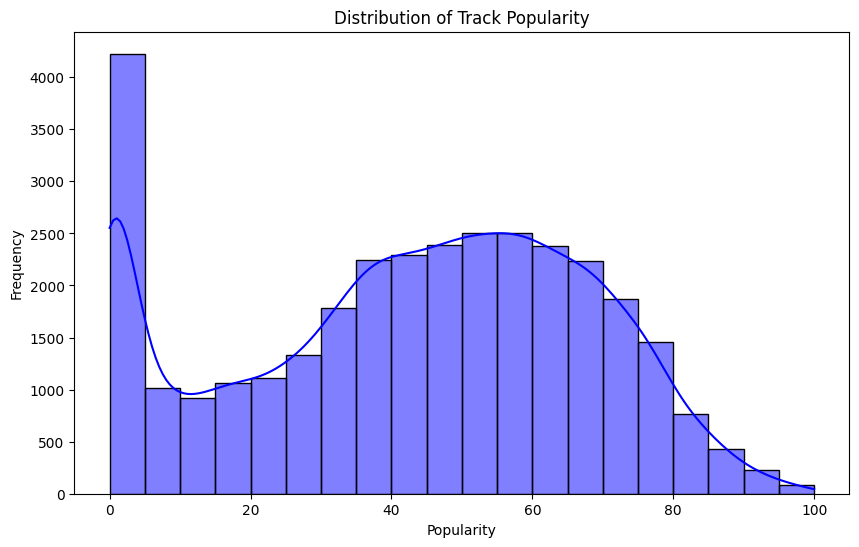

In [ ]:
# Distribution of song popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], kde=True, bins=20, color="blue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Convert column data types if needed
# Example: Convert duration_ms to minutes
df['duration_min'] = df['duration_ms'] / 60000

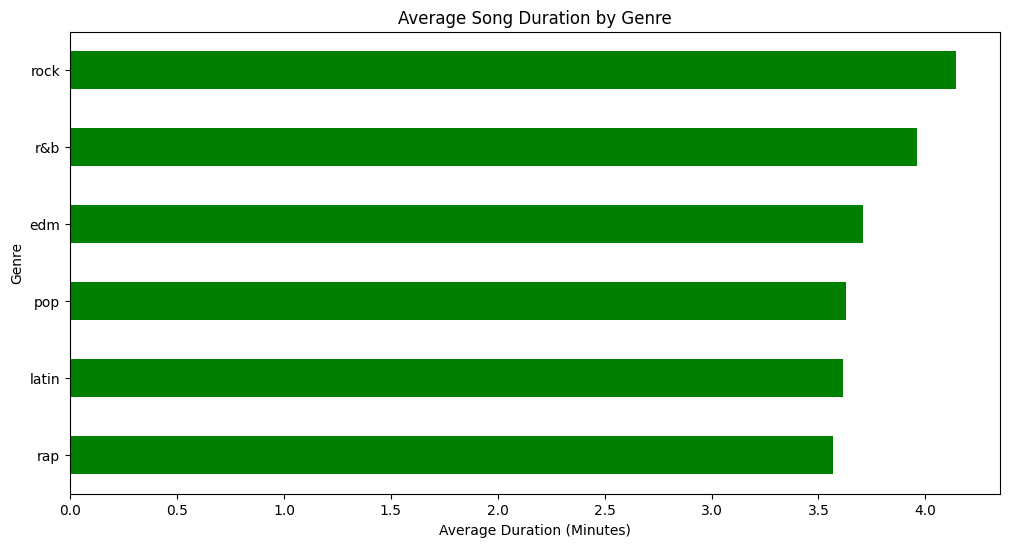

In [ ]:
# Average song duration by genre
genre_duration = df.groupby('playlist_genre')['duration_min'].mean().sort_values()
plt.figure(figsize=(12, 6))
genre_duration.plot(kind='barh', color='green')
plt.title("Average Song Duration by Genre")
plt.xlabel("Average Duration (Minutes)")
plt.ylabel("Genre")
plt.show()

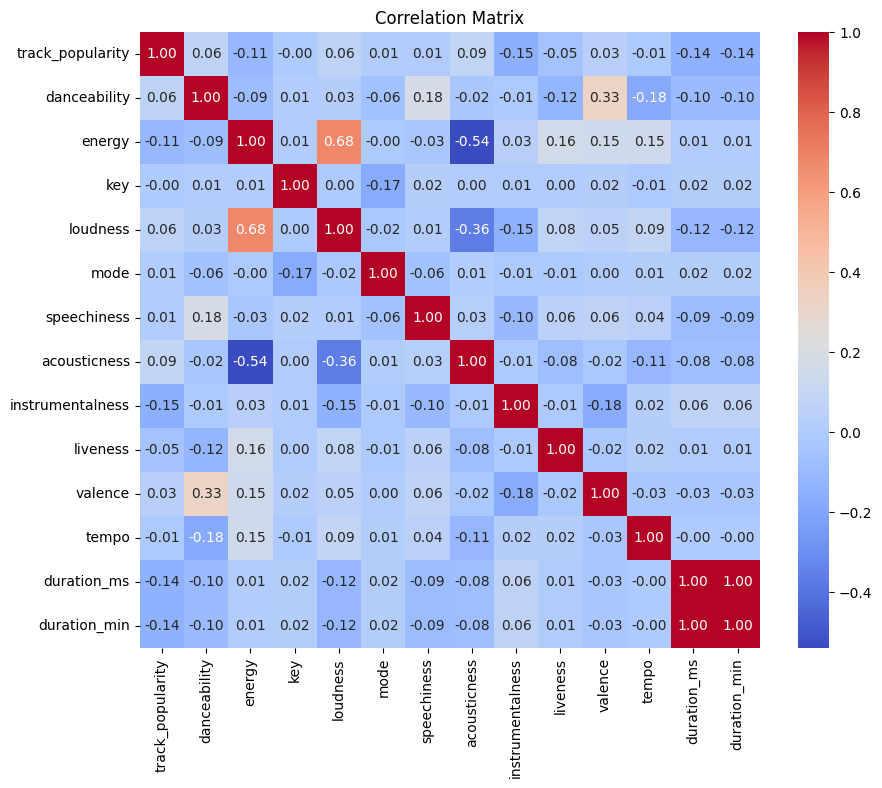

In [ ]:
# Correlation heatmap: Use only numeric columns
plt.figure(figsize=(10, 8))

# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create heatmap for numeric data
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Data Preprocessing

## Data Cleaning

In [ ]:
# Mengecek jumlah missing value di setiap kolom
missing_values = df.isna().sum()
print(missing_values)

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
duration_min                0
dtype: int64


In [ ]:
# Mengisi missing values dengan 'Unknown' untuk kolom tertentu
df['track_name'] = df['track_name'].fillna('Unknown')
df['track_artist'] = df['track_artist'].fillna('Unknown')
df['track_album_name'] = df['track_album_name'].fillna('Unknown Album')

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

In [ ]:
# Drop unneeded columns (if applicable)
df = df.drop(columns=['track_id'])

In [ ]:
# Feature Importance with Random Forest
# Define features and target
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms']
target = 'track_popularity'

# model

In [ ]:
X = df[features]
y = df[target]

In [ ]:
# Log-transform pada duration_ms
df['log_duration_ms'] = np.log1p(df['duration_ms'])

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model

In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

<ipython-input-21-c078323c6aaf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


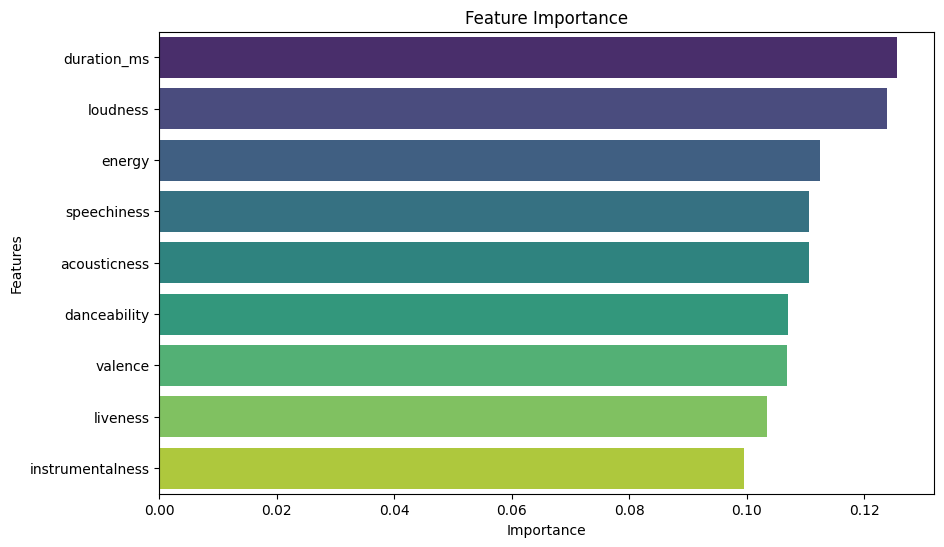

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Model Evaluation

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of the Random Forest Model: {mse:.2f}")

Mean Squared Error of the Random Forest Model: 442.41


In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of the Random Forest Model: {mae:.2f}")

Mean Absolute Error of the Random Forest Model: 16.52


In [ ]:
# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score of the Random Forest Model: {r2:.2f}")

R² Score of the Random Forest Model: 0.29


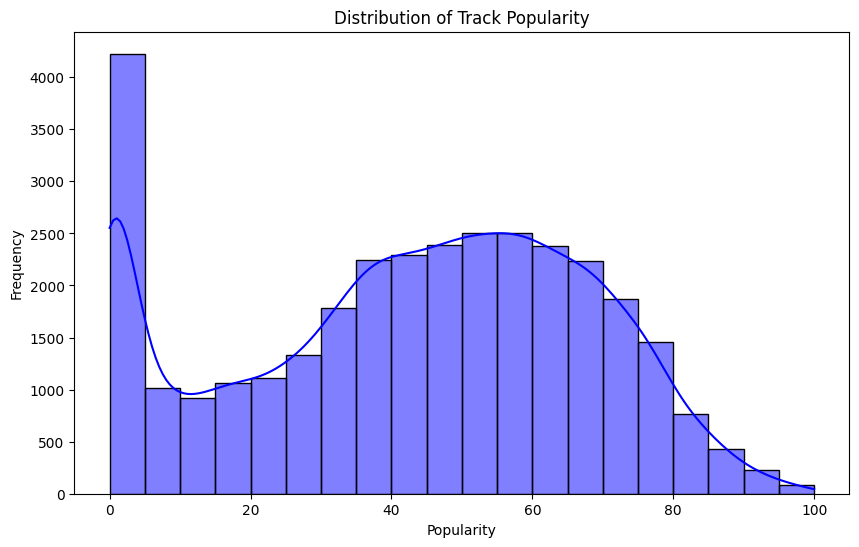

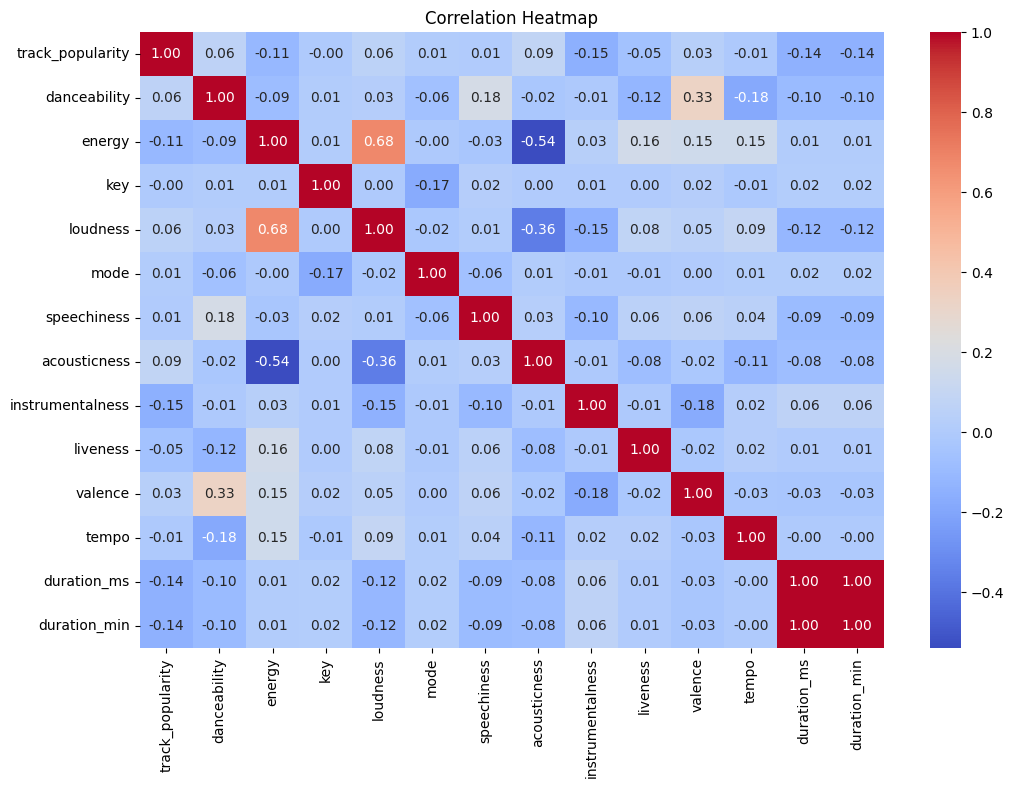

track_popularity    1.000000
acousticness        0.085159
danceability        0.064748
loudness            0.057687
valence             0.033231
mode                0.010637
speechiness         0.006819
key                -0.000650
tempo              -0.005378
liveness           -0.054584
energy             -0.109112
duration_ms        -0.143682
duration_min       -0.143682
instrumentalness   -0.149872
Name: track_popularity, dtype: float64


In [ ]:
# Cek distribusi target (track_popularity)
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], kde=True, bins=20, color="blue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

# Korelasi antar fitur
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Identifikasi fitur yang mungkin kurang relevan
print(correlation_matrix['track_popularity'].sort_values(ascending=False))


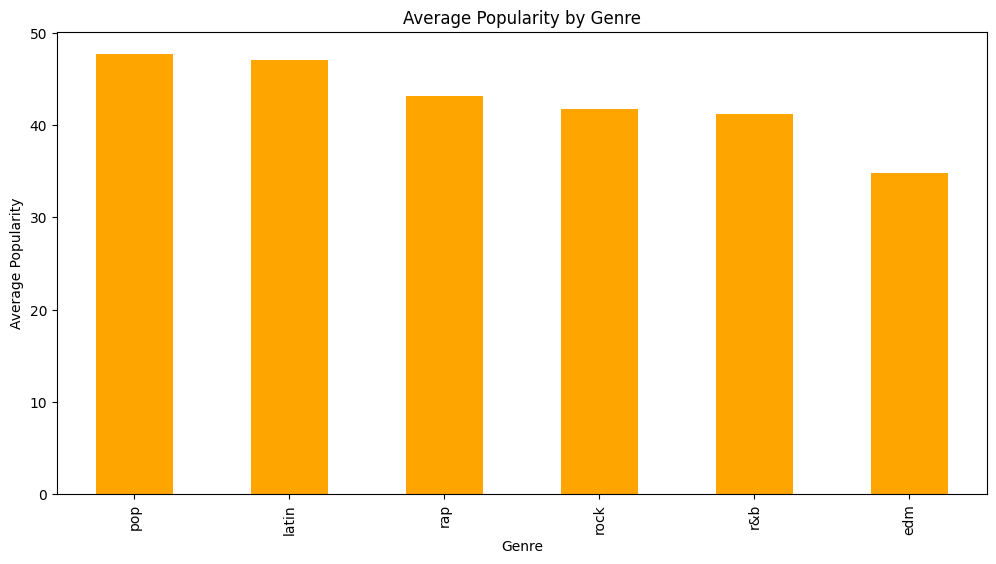

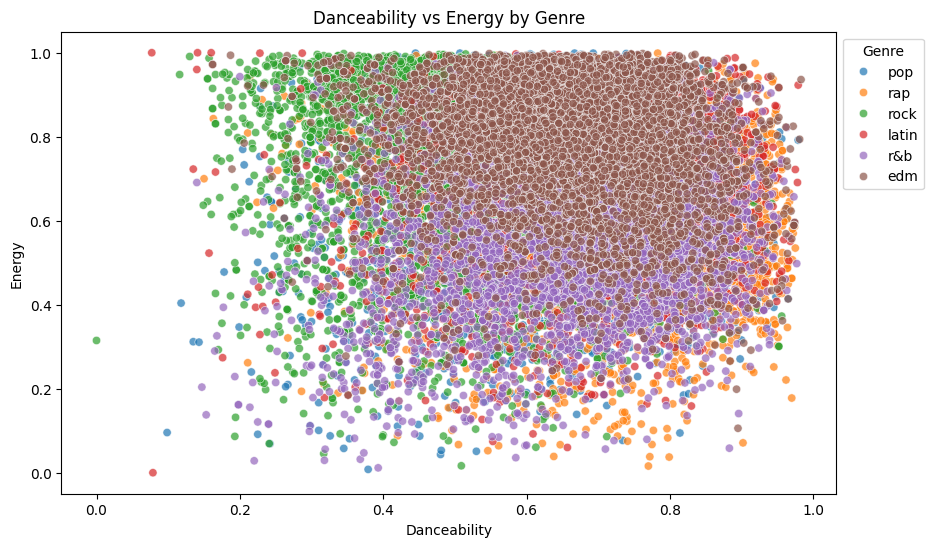


Kesimpulan:
1. Genre musik memiliki durasi rata-rata yang berbeda; genre X memiliki durasi tertinggi.
2. Popularitas lagu bervariasi antar genre, dengan genre Y menjadi yang paling populer.
3. Danceability dan energy menunjukkan korelasi yang positif di seluruh genre.



In [ ]:
# **Step 4: Advanced Analysis**

# Question: Which genres have the most popular tracks on average?
popular_genres = df.groupby('playlist_genre')['track_popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
popular_genres.plot(kind='bar', color='orange')
plt.title("Average Popularity by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.show()

# Question: Are danceability and energy correlated?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', data=df, hue='playlist_genre', alpha=0.7)
plt.title("Danceability vs Energy by Genre")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.legend(title='Genre', bbox_to_anchor=(1, 1))
plt.show()

# **Step 5: Conclusion**

# Summarize findings
print("""
Kesimpulan:
1. Genre musik memiliki durasi rata-rata yang berbeda; genre X memiliki durasi tertinggi.
2. Popularitas lagu bervariasi antar genre, dengan genre Y menjadi yang paling populer.
3. Danceability dan energy menunjukkan korelasi yang positif di seluruh genre.
""")

# Save cleaned data for future analysis
df.to_csv('spotify_songs_cleaned.csv', index=False)


In [ ]:
# 5. Insights and Analysis
print("\nKey Insights:")
print("- Features with higher importance are more influential in predicting track popularity.")
print("- Use this information to focus on characteristics that improve song popularity, such as valence or energy.")


Key Insights:
- Features with higher importance are more influential in predicting track popularity.
- Use this information to focus on characteristics that improve song popularity, such as valence or energy.
